In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi
from netCDF4 import *
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm


In [182]:
file_path = '/home/ubuntu/year3/data_visualisation/Data_EX1.txt'

# Open the file and process the content
with open(file_path, 'r') as file:
    data_lines = [
        [float(value) if value not in {'-99.0', '99.0'} else np.nan 
         for value in line.split()[1:]]  
        for line in file.readlines()[1:]  
    ]

# Convert the list of lists to a NumPy array for further processing
data_array = np.array(data_lines)

# Display the processed data
print(data_array)


[[15.  18.  17.5 18.5 22.9 27.  26.  26.8 26.5 23.6 23.6 16.8]
 [14.3 17.6 16.9 19.1 22.  28.3 27.5 26.4 24.3 24.3 21.3 18.5]
 [13.2 18.1 18.5 20.5 21.8 25.4 26.5 28.1 25.9 23.9 20.  16.9]
 [15.4 19.8 20.9 21.8 21.5 25.8 26.1 27.3 25.6 24.1 18.2 18.4]
 [18.  17.5 16.1 18.9 22.7 25.6 25.2 28.1 26.6 24.1 15.9 15.2]
 [19.4 15.9 15.5 18.2 24.  25.9 25.9 27.6 26.9 21.5 20.1 18.3]
 [15.4 17.5 15.3 20.1 25.6 27.7 25.6 25.6 25.8 21.3 22.4 20.6]
 [12.  16.7 16.1 21.  26.  27.5 26.  27.4 24.8 22.7 25.2 20.5]
 [10.2 15.6 15.5 21.9 26.2 28.3 27.6 27.6 25.9 24.4 25.4 18.5]
 [ 7.6 16.4 19.1 23.5 26.5 28.3 27.4 27.  27.4 24.2 24.8 18.4]
 [10.  18.7 20.7 23.3 26.4 28.3 27.2 25.4 24.9 24.9 26.  20.3]
 [11.5 19.2 19.9 24.4 25.5 29.4 26.  26.9 24.9 25.3 19.5 19.8]
 [10.1 17.9 13.9 23.8 26.1  nan 25.6 26.4 26.3 24.8 18.7 19.7]
 [11.7 21.3 12.1 22.  25.4 27.6 26.6 26.  27.3 20.7 20.  21.5]
 [ 9.4 21.5 15.8 23.2 25.9 24.5 26.8 24.8 25.9 21.8 17.5 19.8]
 [12.8 23.2 19.6 24.5 26.5 25.2 25.6 25.5 24.9 22.4 14.

In [183]:
data = np.array(data_lines).T
data = data.astype(float)
data[data == -99.0] = np.nan
data[data == 99.0] = np.nan


In [184]:
first_day_values = data_lines[0]

first_day_dataframe = pd.DataFrame([
    {
        'Date': f'2009-{month_index + 1:02}-01',  
        'Time': '00:00:00',  
        'Temperature': None if temp == -99 else temp 
    }
    for month_index, temp in enumerate(first_day_values)
])


first_day_dataframe

,Date,Time,Temperature
0,2009-01-01,00:00:00,15.0
1,2009-02-01,00:00:00,18.0
2,2009-03-01,00:00:00,17.5
3,2009-04-01,00:00:00,18.5
4,2009-05-01,00:00:00,22.9
5,2009-06-01,00:00:00,27.0
6,2009-07-01,00:00:00,26.0
7,2009-08-01,00:00:00,26.8
8,2009-09-01,00:00:00,26.5
9,2009-10-01,00:00:00,23.6


In [185]:

num_days = len(data_lines)
num_months = len(data_lines[0])

all_days_data = [
    {
        'Date': f'2009-{month_index + 1:02}-{day_index + 1:02}',  
        'Time': '00:00:00',  
        'Temperature': None if data_lines[day_index][month_index] == -99 else data_lines[day_index][month_index]  
    }
    for month_index in range(num_months)
    for day_index in range(num_days)
]

all_days_df = pd.DataFrame(all_days_data)
all_days_df.to_csv('all_days_data.csv', index=False)
print("Data saved to all_days_data.csv")

Data saved to all_days_data.csv


In [186]:
all_days_df['Date'] = pd.to_datetime(all_days_df['Date'], errors='coerce')
all_days_df['Month'] = all_days_df['Date'].dt.month

ex1

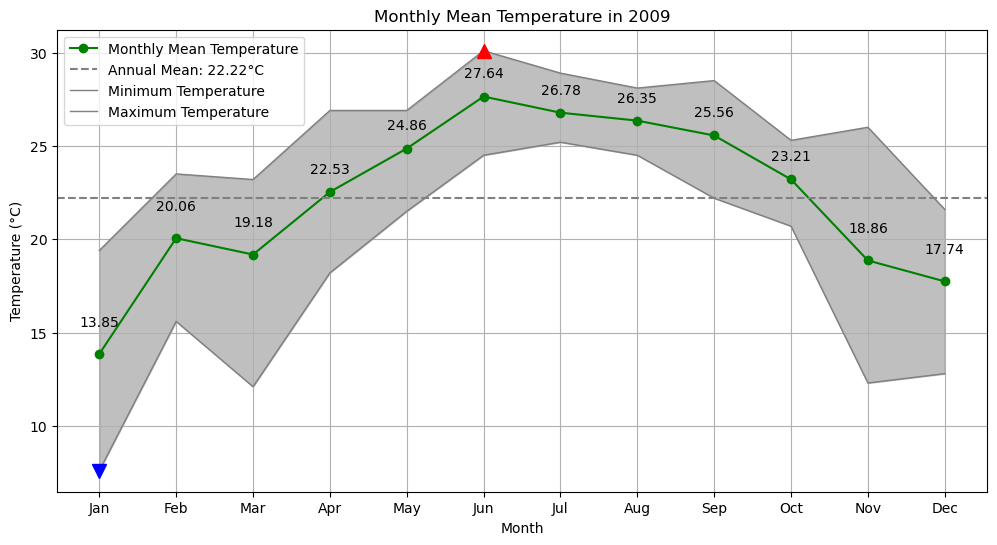

In [187]:
# 1. Calculate the monthly mean temperature
monthly_mean = all_days_df.groupby('Month')['Temperature'].mean()
annual_mean = monthly_mean.mean()  

# 2. Plot monthly mean temperature with annotations above/below
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean.index, monthly_mean, marker='o', color='g', label='Monthly Mean Temperature')
plt.axhline(annual_mean, color='gray', linestyle='--', label=f'Annual Mean: {annual_mean:.2f}°C')
plt.title('Monthly Mean Temperature in 2009')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks([0, 10, 15, 20, 25, 30])
plt.legend()

# Annotate each monthly mean above or below the line
for month, temp in monthly_mean.items():
    if temp >= annual_mean:
        plt.text(month, temp + 1, f'{temp:.2f}', ha='center', color='black')
    else:
        plt.text(month, temp + 1.5, f'{temp:.2f}', ha='center', color='black')

# 3. Plot temperature variability (min-max) for each month using lines
monthly_min = all_days_df.groupby('Month')['Temperature'].min()
monthly_max = all_days_df.groupby('Month')['Temperature'].max()

# Plot the min and max as gray lines
plt.plot(monthly_min.index, monthly_min, color='gray', linestyle='-', linewidth=1, label='Minimum Temperature')
plt.plot(monthly_max.index, monthly_max, color='gray', linestyle='-', linewidth=1, label='Maximum Temperature')

plt.legend()

plt.fill_between(monthly_mean.index, monthly_min, monthly_max, color='gray', alpha=0.5, label='Temperature Range')
# 4. Annotate minimum and maximum temperature
for month in monthly_mean.index:
    min_temp = monthly_min[month]
    max_temp = monthly_max[month]

plt.plot(6, 30.1, color='red', marker='^', markersize=10, label='High Temp (30.1°C)')  # Triangle marker
plt.plot(1, 7.6, color='blue', marker='v', markersize=10, label='High Temp (7.6°C)')  # Triangle marker
plt.grid(True)
plt.show()


ex2

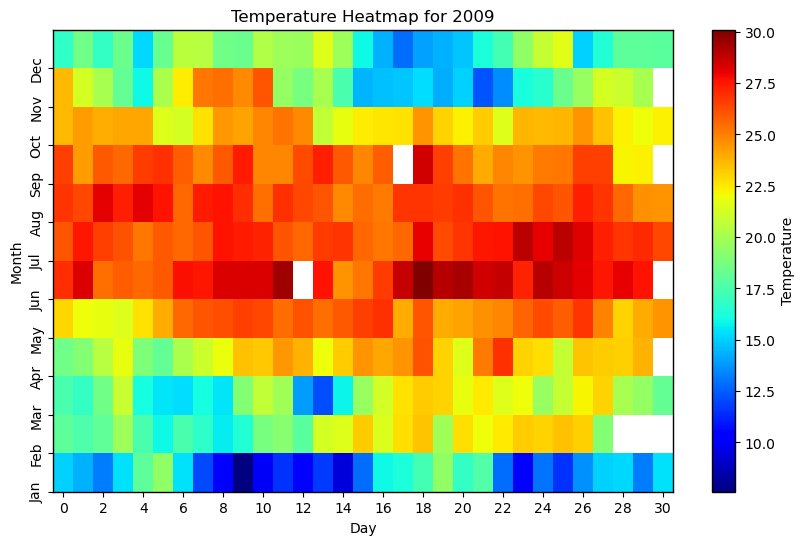

In [192]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
heatmap=sns.heatmap(data, cmap='jet', cbar_kws={'label': 'Temperature'}, xticklabels=2)
plt.title('Temperature Heatmap for 2009')
plt.xlabel('Day')
plt.ylabel('Month')

plt.yticks(np.arange(12), month_names)
plt.gca().invert_yaxis()

for spine in plt.gca().spines.values():
    spine.set_visible(True)  # Ensure the spines are visible
    spine.set_linewidth(1)    # Set the border line width
    spine.set_color('black')  

colorbar = heatmap.collections[0].colorbar
colorbar.outline.set_visible(True)  # Ensure the outline is visible
colorbar.outline.set_linewidth(1)    # Set the border line width
colorbar.outline.set_edgecolor('black')

plt.show()

ex3

<Figure size 1500x600 with 0 Axes>

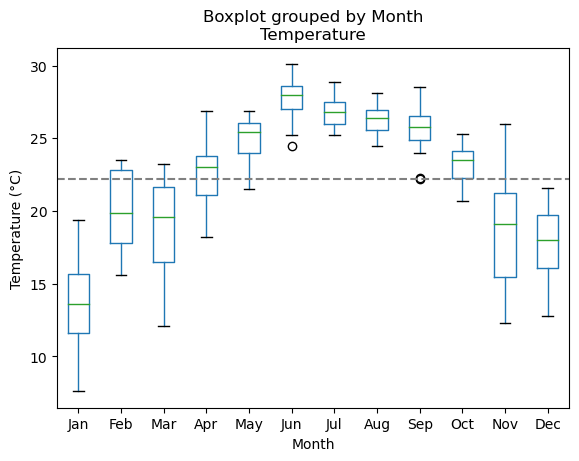

In [167]:
plt.figure(figsize=(15, 6))
all_days_df.boxplot(column='Temperature', by='Month', grid=False)
plt.axhline(annual_mean, color='gray', linestyle='--', label=f'Annual Mean: {annual_mean:.2f}°C')

plt.ylabel('Temperature (°C)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

ex4

In [41]:
from numpy import squeeze


nc_path = '/home/ubuntu/year3/data_visualisation/wrfout_d02_2019-11-12_sample.nc'
nc_file  = Dataset(nc_path,'r')

data = squeeze(nc_file.variables['T2'][:])
print ('\nShape of data: ', data.shape)

lat = squeeze(nc_file.variables['XLAT'][:])
lon = squeeze(nc_file.variables['XLONG'][:])
print ('Shape of lat and lon:', lat.shape, lon.shape)


Shape of data:  (24, 120, 111)
Shape of lat and lon: (120, 111) (120, 111)


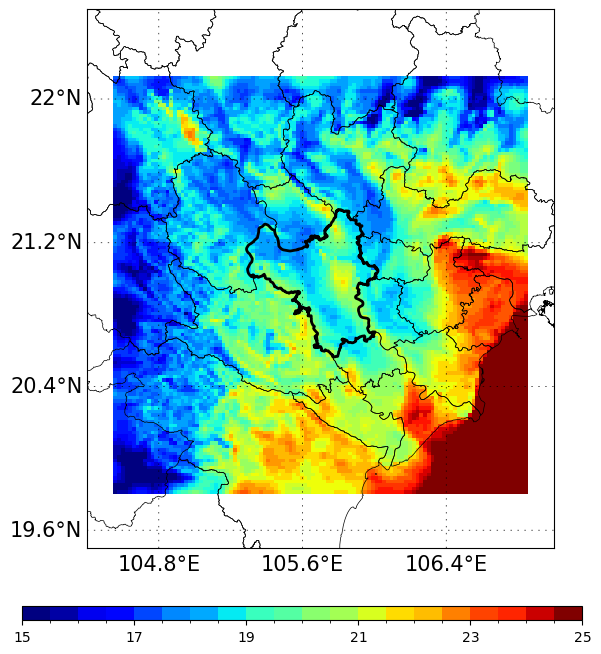

In [47]:
import matplotlib as mpl

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

# Keep the original Vietnam and surrounding region coordinates
lon_min = 104.4
lon_max = 107
lat_min = 19.5
lat_max = 22.5

map = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
              urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', epsg=4326)

map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='black')

# Plot only Hanoi Province by filtering its record from the shapefile
for info, shape in zip(map.vietnam_info, map.vietnam):
    if info['NAME_1'] == 'Hà Nội':  # Check for the province name
        map.plot([x[0] for x in shape], [x[1] for x in shape], linewidth=2, color='black')

# Draw parallels and meridians
parallels = np.arange(-90.,150, np.around((lat_max-lat_min)/4, decimals=1)) 	
meridians = np.arange(0.,180., np.around((lat_max-lat_min)/4, decimals=1))
map.drawparallels(parallels, linewidth=0.5, dashes=[2,8], labels=[1,0,0,0], fontsize=15, zorder=12)
map.drawmeridians(meridians, linewidth=0.5, dashes=[2,8], labels=[0,0,0,1], fontsize=15, zorder=12)

# Plotting data
levels = np.linspace(15, 25, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

norm = BoundaryNorm(levels, ncolors=color_map.N, clip=False)
cm = plt.pcolormesh(lon, lat, data[0,:,:] - 273.15, norm=norm, cmap='jet')

# Adjust colorbar
cbar_ax = fig.add_axes([0.14, 0.007, 0.7, 0.02])  
cmap = mpl.colormaps['jet'].resampled(32)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.linspace(15, 25, 21), cmap.N), cmap=cmap), ticks=np.linspace(15, 25, 6, endpoint=True), cax=cbar_ax, orientation='horizontal')

plt.show()


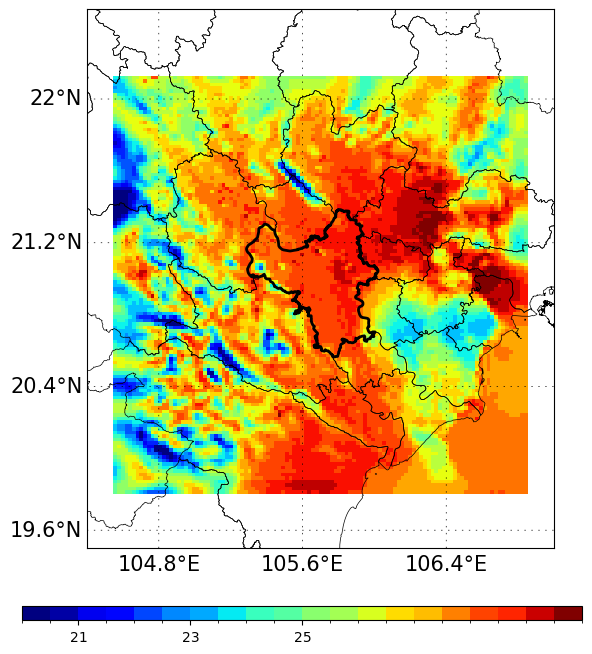

In [58]:
import matplotlib as mpl

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

# Keep the original Vietnam and surrounding region coordinates
lon_min = 104.4
lon_max = 107
lat_min = 19.5
lat_max = 22.5

map = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
              urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', epsg=4326)

map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='black')

# Plot only Hanoi Province by filtering its record from the shapefile
for info, shape in zip(map.vietnam_info, map.vietnam):
    if info['NAME_1'] == 'Hà Nội':  # Check for the province name
        map.plot([x[0] for x in shape], [x[1] for x in shape], linewidth=2, color='black')

# Draw parallels and meridians
parallels = np.arange(-90.,150, np.around((lat_max-lat_min)/4, decimals=1)) 	
meridians = np.arange(0.,180., np.around((lat_max-lat_min)/4, decimals=1))
map.drawparallels(parallels, linewidth=0.5, dashes=[2,8], labels=[1,0,0,0], fontsize=15, zorder=12)
map.drawmeridians(meridians, linewidth=0.5, dashes=[2,8], labels=[0,0,0,1], fontsize=15, zorder=12)

# Plotting data
levels = np.linspace(20, 30, 21, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

norm = BoundaryNorm(levels, ncolors=color_map.N, clip=False)
cm = plt.pcolormesh(lon, lat, data[6,:,:] - 273.15, norm=norm, cmap='jet')

# Adjust colorbar
cbar_ax = fig.add_axes([0.14, 0.007, 0.7, 0.02])  
cmap = mpl.colormaps['jet'].resampled(32)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.linspace(20, 30, 21), cmap.N), cmap=cmap), ticks=np.linspace(15, 25, 6, endpoint=True), cax=cbar_ax, orientation='horizontal')

plt.show()


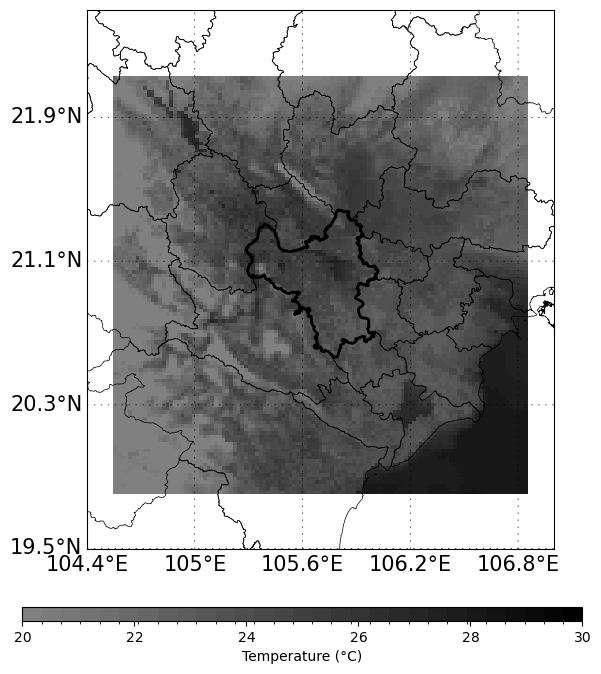

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1)

lon_min, lon_max = 104.4, 107
lat_min, lat_max = 19.5, 22.5

map = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
              urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', epsg=4326)

map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='black')
for info, shape in zip(map.vietnam_info, map.vietnam):
    if info['NAME_1'] == 'Hà Nội':
        map.plot([x[0] for x in shape], [x[1] for x in shape], linewidth=2, color='black')

# Draw parallels and meridians
parallels = np.arange(lat_min, lat_max, np.around((lat_max - lat_min) / 4, decimals=1))
meridians = np.arange(lon_min, lon_max, np.around((lon_max - lon_min) / 4, decimals=1))
map.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=15)
map.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=15)

# Define levels and create black-to-grey colormap
levels = np.linspace(20, 30, 30, endpoint=True)
black_grey_cmap = LinearSegmentedColormap.from_list("black_grey", [ "grey","black"])
black_grey_cmap.set_bad(color='white')  # Handle missing data with white color

# Assume `lon`, `lat`, and `data` are provided
norm = BoundaryNorm(levels, ncolors=black_grey_cmap.N, clip=False)
cm = plt.pcolormesh(lon, lat, data[12, :, :] - 273.15, norm=norm, cmap=black_grey_cmap)

# Adjust and add colorbar
cbar_ax = fig.add_axes([0.14, 0.007, 0.7, 0.02])
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=black_grey_cmap),
                    ticks=np.linspace(20, 30, 6), cax=cbar_ax, orientation='horizontal')
cbar.set_label('Temperature (°C)')

plt.show()


ex5

In [66]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from scipy.stats import ttest_ind

In [84]:
data = xr.open_dataset('sst.nc')
sst_nino34 = data.sel(lat=slice(-5,5), lon=slice(190,240))
tmp = sst_nino34.sst.groupby('time.month')
tmp1 = tmp - tmp.mean(dim='time')
index_nino34 = tmp1.mean(dim=['lat', 'lon'])

In [85]:
elnino = index_nino34.where(index_nino34 >= 1)
lanina = index_nino34.where(index_nino34 <= -1)
neutral = index_nino34.where((index_nino34 < 1) & (index_nino34 > -1))

Text(0.5, 1.0, 'SST anomaly over the Niño 3.4 region')

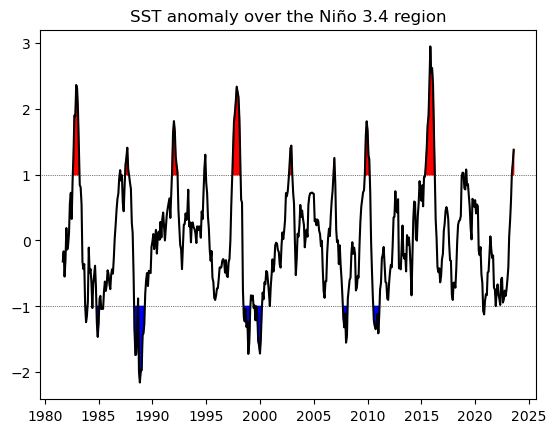

In [86]:
plt.plot(index_nino34['time'], index_nino34, 'k')
plt.fill_between(index_nino34['time'], 1, elnino, color='red')
plt.fill_between(index_nino34['time'], -1, lanina, color='blue')
plt.axhline(1,  color='black', linewidth=0.5, linestyle='dotted')
plt.axhline(-1, color='black', linewidth=0.5, linestyle='dotted')
plt.title('SST anomaly over the Niño 3.4 region')

In [108]:
gb = sst_nino34.sst.groupby('time.month')
sst_nino34_anom = gb - gb.mean(dim='time')
index_nino34 = sst_nino34_anom.mean(dim=['lat', 'lon'])
file = '/home/ubuntu/year3/data_visualisation/precip.mon.mean(1).nc'
ds_precip = xr.open_dataset(file)
ds_precip = ds_precip.sel(time=slice(index_nino34['time'][0], index_nino34['time'][-1]))
ds_climo = ds_precip.groupby('time.month').mean()
ds_anoms = ds_precip.groupby('time.month') - ds_climo
elnino_precip = ds_anoms.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
lanina_precip = ds_anoms.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
neutral_precip = ds_anoms.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')
comp_precip = [elnino_precip, lanina_precip, neutral_precip]

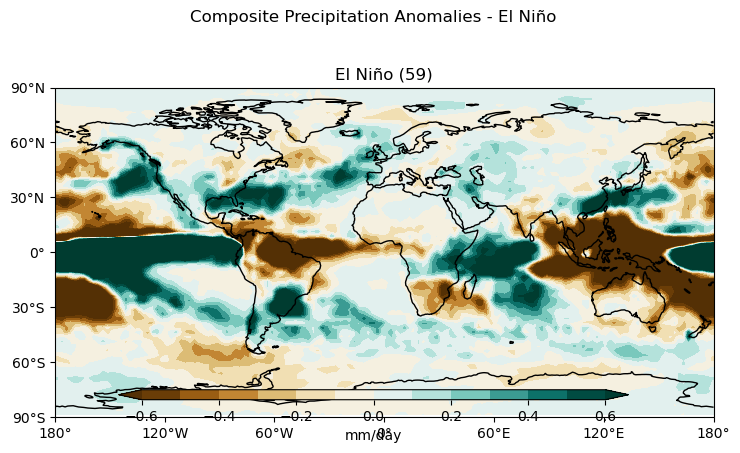

In [107]:

labels = ['El Niño', 'La Niña', 'Neutral']
counts = [elnino.count(dim='time').values, lanina.count(dim='time').values, neutral.count(dim='time').values]

clevs = np.arange(-0.6, 0.7, 0.1)

fig, ax = plt.subplots(figsize=(8.5, 5), subplot_kw={'projection': ccrs.PlateCarree()})

i = 0
data = comp_precip[i]['precip']
data, lons = add_cyclic_point(data, coord=comp_precip[i]['lon'])
cs = ax.contourf(lons, comp_precip[i]['lat'], data, clevs, 
                 transform=ccrs.PlateCarree(), cmap='BrBG', extend='both')

ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
ax.set_title(f"{labels[i]} ({counts[i]})")
ax.coastlines()

cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm/day')

plt.suptitle('Composite Precipitation Anomalies - El Niño')
plt.show()



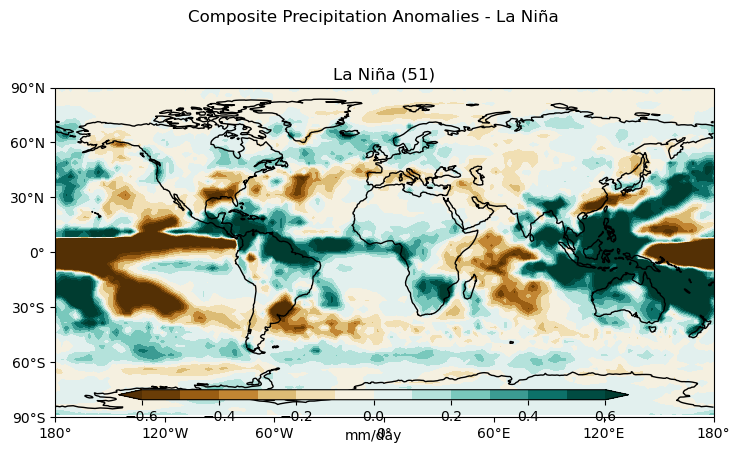

In [106]:

fig, ax = plt.subplots(figsize=(8.5, 5), subplot_kw={'projection': ccrs.PlateCarree()})


i = 1
data = comp_precip[i]['precip']
data, lons = add_cyclic_point(data, coord=comp_precip[i]['lon'])
cs = ax.contourf(lons, comp_precip[i]['lat'], data, clevs, 
                 transform=ccrs.PlateCarree(), cmap='BrBG', extend='both')

ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
ax.set_title(f"{labels[i]} ({counts[i]})")
ax.coastlines()

cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm/day')

plt.suptitle('Composite Precipitation Anomalies - La Niña')
plt.show()



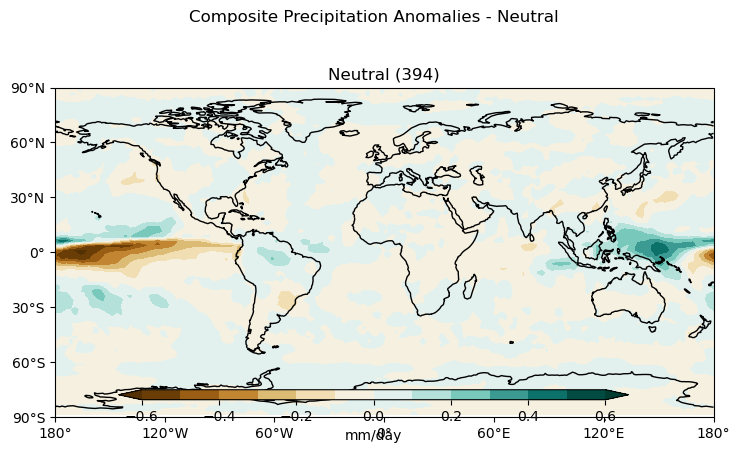

In [105]:
fig, ax = plt.subplots(figsize=(8.5, 5), subplot_kw={'projection': ccrs.PlateCarree()})

i = 2
data = comp_precip[i]['precip']
data, lons = add_cyclic_point(data, coord=comp_precip[i]['lon'])
cs = ax.contourf(lons, comp_precip[i]['lat'], data, clevs, 
                 transform=ccrs.PlateCarree(), cmap='BrBG', extend='both')

ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
ax.set_title(f"{labels[i]} ({counts[i]})")
ax.coastlines()

cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm/day')
plt.suptitle('Composite Precipitation Anomalies - Neutral')
plt.show()
